Copyright 2022 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [ ]:
from jax import numpy as jnp
# force double precision
from jax.config import config
config.update("jax_enable_x64", True)

from matplotlib import pyplot as plt

from sobolev import chebyshev
from sobolev import utils


In [ ]:
x = jnp.linspace(0, 3, 1000)
y = jnp.linspace(-5, 5, 1000)

X, Y = jnp.meshgrid(x, y)


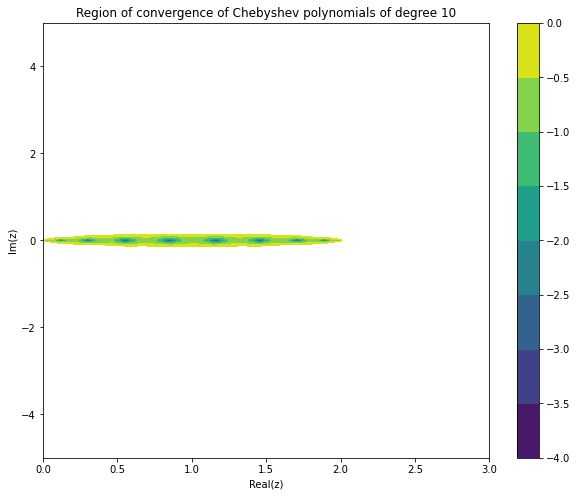

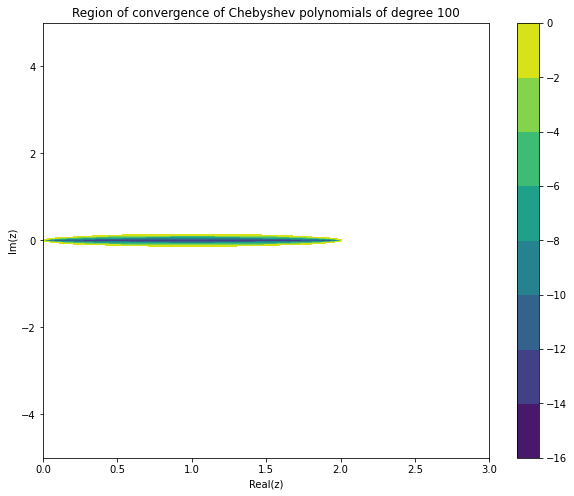

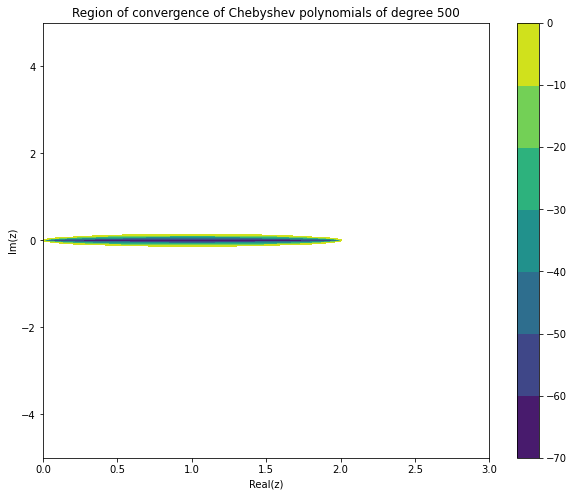

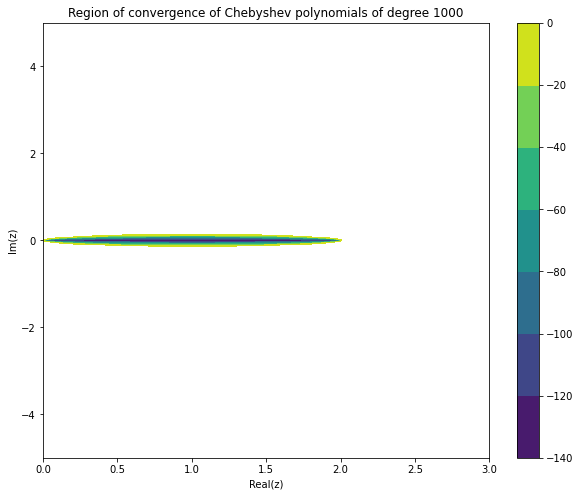

In [ ]:
for degree in [10, 100, 500, 1000]:
  plt.figure(figsize=(10, 8))
  plt.title('Region of convergence of Chebyshev polynomials of degree %s' % degree)
  Z = jnp.abs(special.eval_chebyt(degree, X + Y * 1j, normalization='residual', low=0.01, high=2.))
  Z = Z.at[Z > 1].set(jnp.nan)
  plt.contourf(X, Y, jnp.log(Z))
  plt.xlabel('Real(z)')
  plt.ylabel('Im(z)')
  plt.colorbar()
  plt.show()

In [ ]:
def rec_extragradient_residual(step: float, momentum: float):
  """Recurrence for the Residual Chebyshev polynomial."""
  # Reference: https://fa.bianp.net/blog/2020/polyopt/
  while True:
    yield 1 + momentum, -step, step * step, - momentum

def extragradient_residual(n, x, step, momentum):
  coefs = rec_extragradient_residual(step, momentum)
  return utils.eval_four_term(n, coefs, x)

In [ ]:
x = jnp.linspace(0, 3, 1000)
y = jnp.linspace(-3, 3, 1000)

X, Y = jnp.meshgrid(x, y)

step = 1
momentum = 0.9


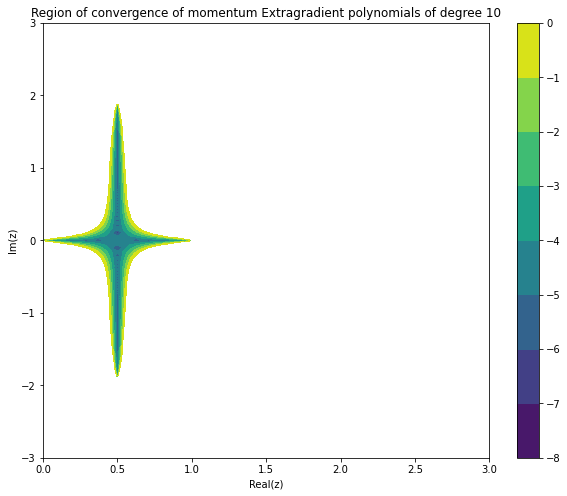

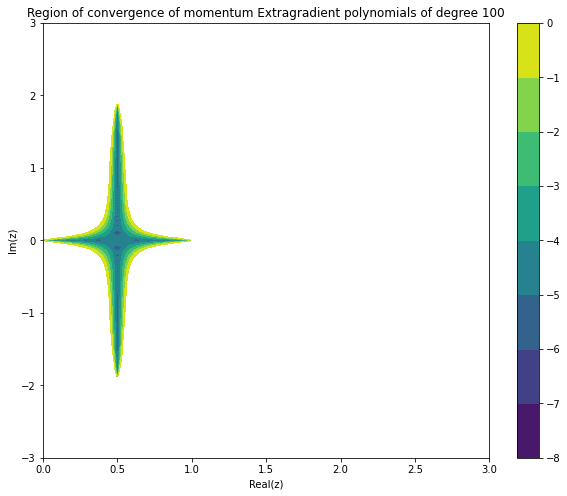

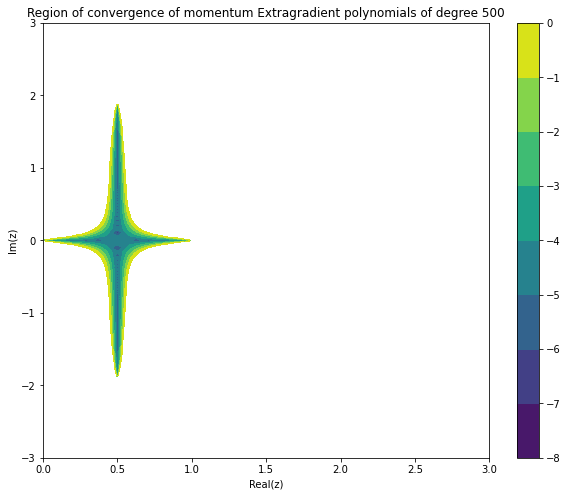

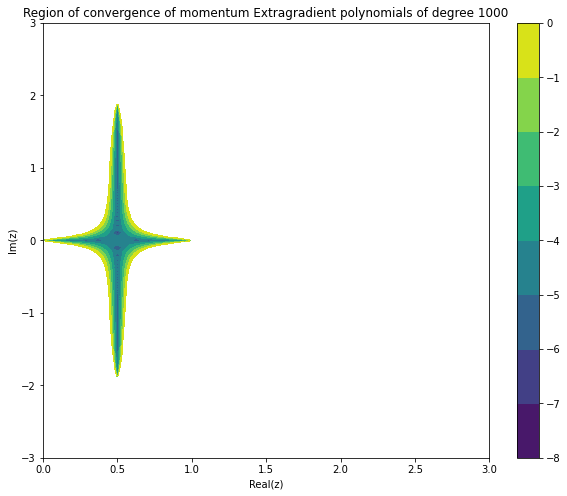

In [ ]:
for degree in [10, 100, 500, 1000]:

  Z = jnp.abs(extragradient_residual(100, X + Y * 1j, step, momentum))
  Z = Z.at[Z > 1].set(jnp.nan)
  plt.figure(figsize=(10, 8))
  plt.title('Region of convergence of momentum Extragradient polynomials of degree %s' % degree)
  plt.contourf(X, Y, jnp.log(Z))
  plt.colorbar()
  plt.xlabel('Real(z)')
  plt.ylabel('Im(z)')
  plt.show()